In [1]:
#1.2  Most and least frequent outgoing numbers
#1.  Identify the 3 numbers with the mostcountsof outgoing calls.
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
data=pd.read_excel("/content/phone_data.xlsx")
table1=data.iloc[:,[4,5]]
table11=table1[table1["Call type"]=="Outgoing"]
table12=table11.groupby(by=["Number called (to/from)"]).count()
table13=table12.sort_values(by="Call type",ascending=False)
print(table13.head(3),table13.tail(1))

                         Call type
Number called (to/from)           
A_1                            111
A_5                             48
B_3                             28                          Call type
Number called (to/from)           
G_2                              1


In [2]:
#1.3  Highest and lowest total duration of outgoing calls
#1.  Repeat the same exercise as in the previous subsection, but with the totaldurationper numbercalled.
table2=data.iloc[:,[4,5,6]]
table21=table2[table2["Call type"]=="Outgoing"]
table22=table21.drop(columns=["Call type"])
table23=table22.groupby(by=["Number called (to/from)"]).sum()
table24=table23.sort_values(by="Duration",ascending=False)
print(table24.head(3),table24.tail(1))

                         Duration
Number called (to/from)          
A_1                          1146
A_5                           427
A_4                            96                          Duration
Number called (to/from)          
C_1                             1


In [3]:
#1.4  Location of outgoing calls
#1.  What are the number ofcountsfor every location of outgoing calls?
table3=data.iloc[:,[2,5]]
table31=table3[table3["Call type"]=="Outgoing"]
table32=table31.groupby(by=["From city"]).count()
table33=table32.sort_values(by="Call type",ascending=False)
print(table33)

              Call type
From city              
TORONTO ON          244
NEWMARKET ON          2
CLAREMONT ON          1


   month  outgoing  imcoming
0      7       190        84
1      8       281        54
2      9       714       244
3     10       621        63
4     11       196        87


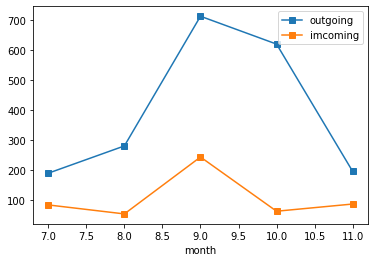

In [5]:
#1.5  Incoming and Outgoing calls pattern
#1.  Calculate thetotal durationof incoming and outgoing calls per month.
table4=data.iloc[:,[0,5,6]].copy()
table4["Date"]=pd.to_datetime(table4["Date"])
table4["Date"]=table4["Date"].dt.month
table41=table4[table4["Call type"]=="Outgoing"]
table42=table4[table4["Call type"]=="Incoming"]
table43=table41.groupby(by=["Date"]).sum()
table44=table42.groupby(by=["Date"]).sum()
table45=pd.DataFrame({"outgoing":table43["Duration"],"imcoming":table44["Duration"]})
table45.index.name="month"
print(table45.reset_index())
#2.  Plot the results in one graph for both incoming and outgoing calls.
table45.plot(style='s-')
plt.show()
#3.  Do you see anything unusual in the pattern?  E.g.  does this look like a phone line thatwas used for criminal activities or more like a personal phone?
#The number of outgoing calls are significantly larger than the number of incoming call. 

Call type
1     9
2     3
3     3
4     1
20    1
Name: From city, dtype: int64


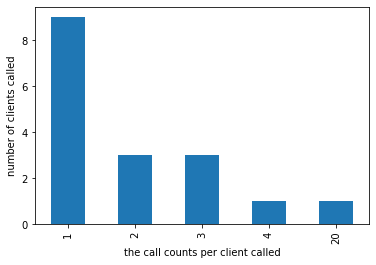

In [6]:
#1.6  Distribution of calls
#Plot the histogram of theoutbound call counts;  e.g.  x-axis:  the call counts per clientcalled, y-axis:  number of clients called.
table5=data.iloc[:,[2,3,4,5]].copy()
table51=table5[table5["Call type"]=="Outgoing"]
table52=table51[table51["From city"]!=table51["To city"]]
table53=table52.groupby(by=["Number called (to/from)"]).count()
table54=table53.groupby(by=["Call type"]).count()
print(table54["From city"])
table54["From city"].plot(kind="bar")
plt.xlabel("the call counts per client called")
plt.ylabel("number of clients called")
plt.show()

In [ ]:
#2.3  Coding the problem
#1.  Generate a pandas dataframe that simulatesNcoin tosses forwgamblers with thenp.random.rand function.  SetN=100 coin tosses andw=100 gamblers and add theprefix ’prob’ to the column name.
a=["prob_"+str(k) for k in range(1,101)]
model1=pd.DataFrame(data=np.random.rand(100,100),index=np.arange(1,101,1),columns=a)
print(model1)
#2.  Initialize an additionalwcolumns [’balance’ + str(x)] with the value 100 to capturethe initial wealth of 100$, where:  x in range(0, w).
b=["balance_"+str(i) for i in range(1,101)]
c=np.concatenate((a, b))
model2=pd.DataFrame(data=np.concatenate((np.random.rand(100,100),np.zeros((100,100))),axis=1),index=np.arange(1,101),columns=c)
print(model2)
#3.  Create a two-level for loop that iterates through rows 1 to N first and columns w to2×w next implementing the calculation logic for every prob-balance pair:
def step3(model):
  for i in range(0,100):
    balance=100
    for x in range(0,100):
      if model.iloc[x,i]>=0.5:
        balance=balance*1.5
      else:
        balance=balance*0.6
      model.iloc[x,100+i]=balance
      x=x+1
    i=i+1
  return model
model3=step3(model2)
print(model3)
#4.  Plot the time trajectories (in gamble iterations) of the wealth per gambler and calculatehow  many  gamblers  havemorethan  their  initial  100$.   What  happens  when  youincreaseNto 1,000 (Figure 2 in the original paper, except the red and blue line)?  Howmany gamblers with more than 100$do you have at t=1,000?
model4=model3.iloc[:,100:200]
model4.plot(kind="line",xlabel="tosses counts",ylabel="balance",style=".-",logy=True)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
loser=model4.tail(1)[model4.tail(1)>100].isna()
print(100-loser.sum().sum())#number of winners

In [97]:
#n=1000
model5=pd.DataFrame(data=np.concatenate((np.random.rand(1000,100),np.zeros((1000,100))),axis=1),index=np.arange(1,1001),columns=c)
def step31(model):
  for i in range(0,100):
    balance=100
    for x in range(0,1000):
      if model.iloc[x,i]>=0.5:
        balance=balance*1.5
      else:
        balance=balance*0.6
      model.iloc[x,100+i]=balance
      x=x+1
    i=i+1
  return model
model6=step31(model5)
print(model6)
model7=model6.iloc[:,100:200]
print(model7)
loser2=model7.tail(1)[model7.tail(1)>100].isna()
print(100-loser2.sum().sum())#number of winners

16
        prob_1    prob_2    prob_3  ...    balance_98    balance_99   balance_100
1     0.574435  0.412940  0.050353  ...  1.500000e+02  6.000000e+01  6.000000e+01
2     0.750200  0.398386  0.827124  ...  2.250000e+02  9.000000e+01  3.600000e+01
3     0.735084  0.749664  0.656616  ...  1.350000e+02  5.400000e+01  5.400000e+01
4     0.891833  0.187424  0.045398  ...  8.100000e+01  3.240000e+01  8.100000e+01
5     0.217745  0.076110  0.928636  ...  1.215000e+02  1.944000e+01  4.860000e+01
...        ...       ...       ...  ...           ...           ...           ...
996   0.772231  0.064951  0.415129  ...  2.550291e-20  9.728588e-17  5.798690e-12
997   0.992143  0.399762  0.663660  ...  1.530175e-20  1.459288e-16  3.479214e-12
998   0.358088  0.933805  0.863751  ...  2.295262e-20  2.188932e-16  2.087528e-12
999   0.518857  0.309492  0.999521  ...  1.377157e-20  3.283398e-16  3.131293e-12
1000  0.685303  0.482063  0.333895  ...  8.262943e-21  1.970039e-16  1.878776e-12

[1000 rows x

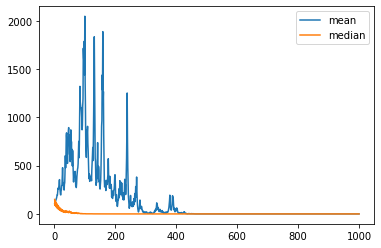

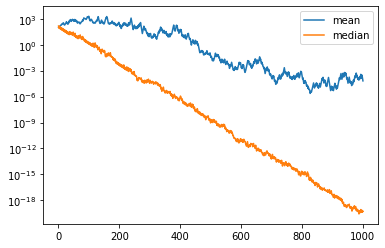

In [92]:
#5.  Plot the time trajectories of themeanandmedianwealth at every time point from0 to 1,000.  Try both linear and logarithmic scaler for the wealth axis.  What are yourobservations?
import math
model8=model7.copy()
model9=model8.copy()
model9["mean"]=model8.mean(axis=1)
model9["median"]=model8.median(axis=1)
model9.plot(y=["mean","median"],kind="line")
model9.plot(y=["mean","median"],kind="line",logy=True)
plt.show()

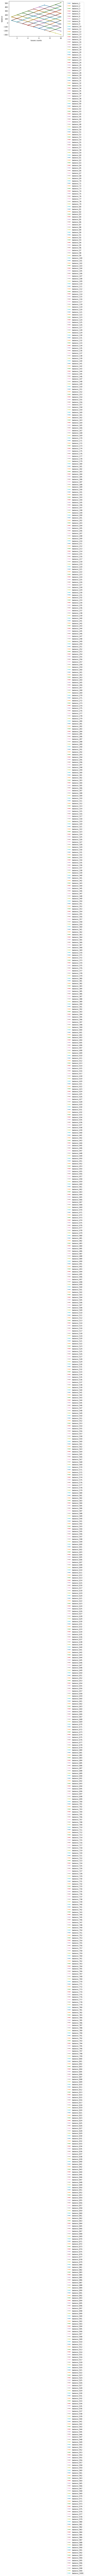

In [96]:
#6.  Repeat steps 3-5 withN=10 andw=1,000 with the following logic:
d=["prob_"+str(k) for k in range(1,1001)]
e=["balance_"+str(i) for i in range(1,1001)]
f=np.concatenate((d, e))
model10=model2=pd.DataFrame(data=np.concatenate((np.random.rand(10,1000),np.zeros((10,1000))),axis=1),index=np.arange(1,11),columns=f)
def step32(model):
  for i in range(0,1000):
    balance=100
    for x in range(0,10):
      if model.iloc[x,i]>=0.5:
        balance=balance+50
      else:
        balance=balance-40
      model.iloc[x,1000+i]=balance
      x=x+1
    i=i+1
  return model
model11=step32(model10)
model12=model11.iloc[:,1000:2000]
model12.plot(kind="line",xlabel="tosses counts",ylabel="balance",style=".-")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
loser=model12.tail(1)[model12.tail(1)>100].isna()
print(1000-loser.sum().sum())#number of winners
model13=model12.copy()
model14=model13.copy()
model14["mean"]=model13.mean(axis=1)
model14["median"]=model13.median(axis=1)
print(model14)
model14.plot(y=["mean","median"],kind="line")
model14.plot(y=["mean","median"],kind="line",logy=True)
plt.show()
